In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [136]:
import pandas as pd
tit_train = pd.read_csv(r"/kaggle/input/titanic/train.csv")
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
#del titanic_train['Cabin']
#titanic_train.fillna(0, inplace=True)
tit_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
tit_train.shape

(891, 12)

In [141]:
tit_train.duplicated().sum()

0

In [142]:
tit_train.describe(include = "object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [143]:
mean1 = tit_train['Age'].mean()
print(mean1)

tit_train['Age'].fillna(mean1, inplace = True)


29.69911764705882


/tmp/ipykernel_35/1897248166.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_train['Age'].fillna(mean1, inplace = True)


In [144]:
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
md = tit_train['Embarked'].mode()
print(md)

tit_train['Embarked'].fillna(md[0], inplace = True)

0    S
Name: Embarked, dtype: object


/tmp/ipykernel_35/1642165619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_train['Embarked'].fillna(md[0], inplace = True)


In [146]:
#tit_train.isnull().sum()
tit_train.drop('Cabin',axis = 1,inplace = True) 

In [147]:
tit_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [148]:
rel_embar = tit_train.groupby('Embarked')['Fare'].sum()
print(rel_embar.sort_values(ascending = False))


Embarked
S    17599.3988
C    10072.2962
Q     1022.2543
Name: Fare, dtype: float64


- 10 group by and visualize.
- Changing categorical to Numerical(label Encoding,OneHotEncoding)
- Read and create a Decision tree Model.
  

In [149]:
tit_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

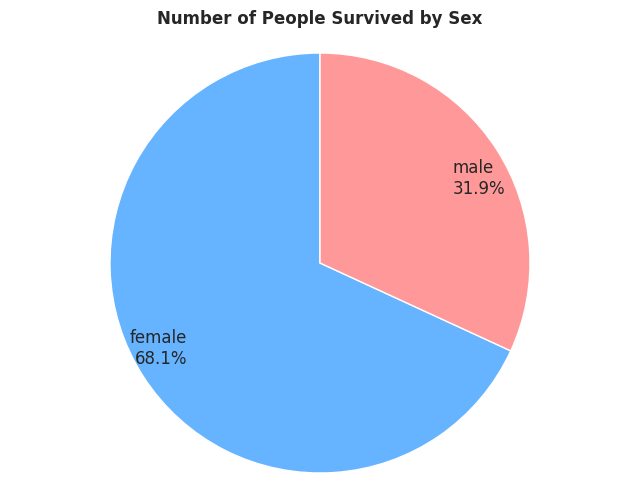

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
# Number of people who survived by sex
num_pp = tit_train.groupby('Sex')['Survived'].sum()
num_pp = num_pp.reset_index()


labels = num_pp['Sex']
sizes = num_pp['Survived']

combined_labels = [f'{label}\n{size / sum(sizes) * 100:.1f}%' for label, size in zip(labels, sizes)]

plt.figure(figsize=(8, 6))
texts = plt.pie(
    sizes,
    labels= combined_labels,
    labeldistance = 0.75,
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    textprops={'fontsize': 12} 
)

plt.title('Number of People Survived by Sex', fontweight='bold')
plt.axis('equal')
plt.show()


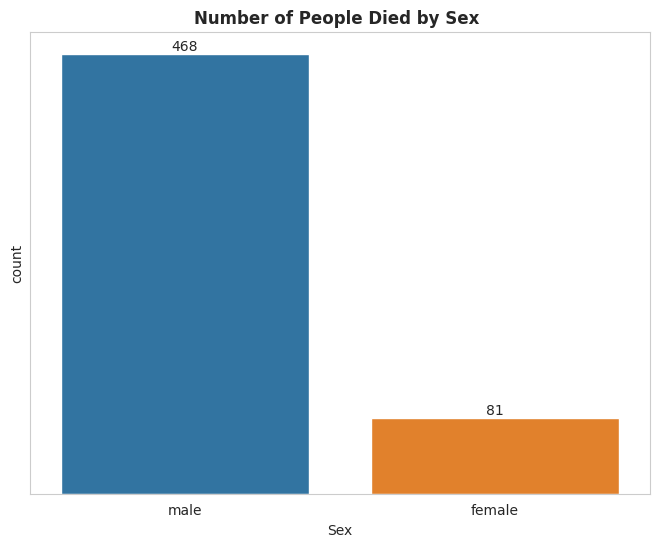

In [151]:
# Number of people who died by sex
num_pd = tit_train[tit_train['Survived'] == 0]


plt.figure(figsize = (8,6))
ax = sns.countplot(data = num_pd, x = 'Sex')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            round(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
plt.yticks(ticks = [], labels =[])
plt.title('Number of People Died by Sex ', fontweight = 'bold')
plt.show()


/tmp/ipykernel_35/4194723723.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_pp = tit_train.groupby('Age Group')['Survived'].sum().sort_values(ascending = False)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


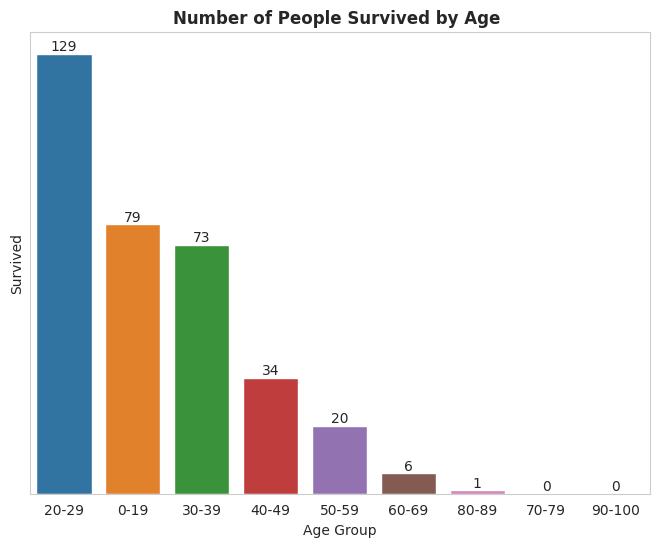

In [152]:
#Number of people who survived by Age
bins = [0,20,30,40,50,60,70,80,90,100]
labels =['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
tit_train['Age Group'] = pd.cut(tit_train['Age'],bins = bins, labels = labels,right = False)
#print(tit_train[['Age','Age Group']])


num_pp = tit_train.groupby('Age Group')['Survived'].sum().sort_values(ascending = False)
num_pp = num_pp.reset_index()

order = num_pp['Age Group']



plt.figure(figsize = (8,6))
ax = sns.barplot(data = num_pp, x = 'Age Group',y = 'Survived', order = order)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/ 2,
            bar.get_height(),
            round(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
plt.yticks(ticks = [], labels =[])
plt.title('Number of People Survived by Age ', fontweight = 'bold')
plt.show()


/tmp/ipykernel_35/2000246946.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_pp = tit_train[tit_train['Survived'] == 0].groupby('Age Group').count().sort_values(by = 'Survived',ascending = False)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


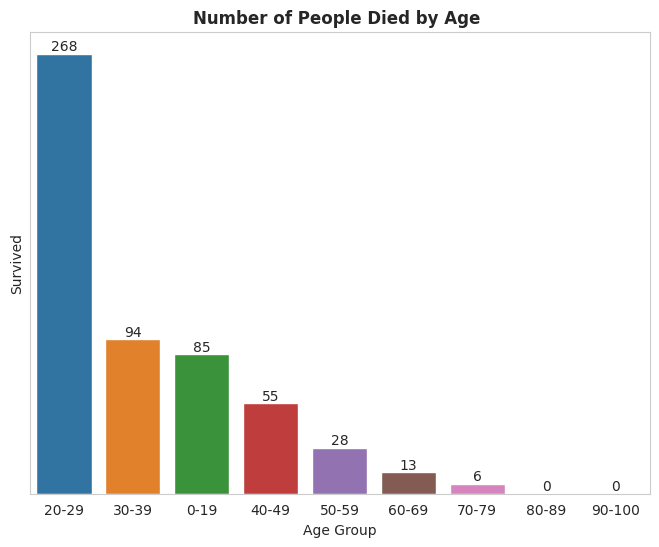

In [153]:
#Number of people who died by Age
bins = [0,20,30,40,50,60,70,80,90,100]
labels =['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
tit_train['Age Group'] = pd.cut(tit_train['Age'],bins = bins, labels = labels,right = False)
#print(tit_train[['Age','Age Group']])

num_pp = tit_train[tit_train['Survived'] == 0].groupby('Age Group').count().sort_values(by = 'Survived',ascending = False)
num_pp = num_pp.reset_index()

order = num_pp['Age Group']
max_age_group = num_pp.loc[num_pp['Survived'].idxmax(), 'Age Group']

palette = ['green' if age == max_age_group else 'blue' for age in num_pp['Age Group']]


plt.figure(figsize = (8,6))
ax = sns.barplot(data = num_pp, x = 'Age Group',y = 'Survived', order = order)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            round(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
plt.yticks(ticks = [], labels =[])
plt.title('Number of People Died by Age ', fontweight = 'bold')
plt.show()

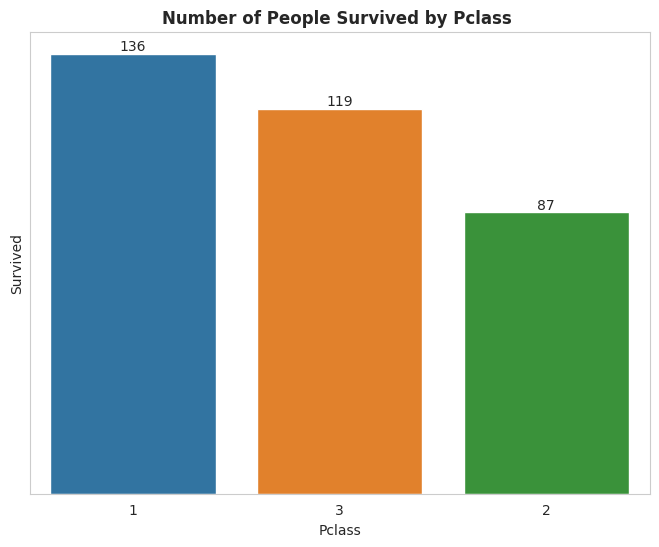

In [154]:
# Number of people who survived by Pclass
num_pc = tit_train.groupby('Pclass')['Survived'].sum().sort_values(ascending = False)
num_pc = num_pc.reset_index()
order = num_pc['Pclass']


plt.figure(figsize = (8,6))
ax = sns.barplot(data = num_pc, x = 'Pclass',y = 'Survived',order = order)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            round(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
plt.yticks(ticks = [], labels =[])
plt.title('Number of People Survived by Pclass ', fontweight = 'bold')
plt.show()

<Figure size 800x600 with 0 Axes>

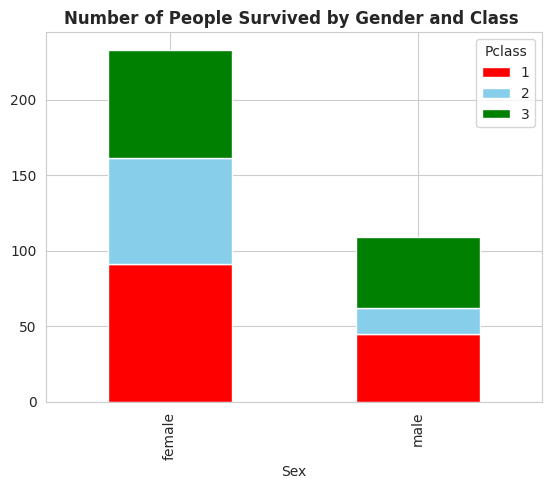

In [155]:
# Number of passengers who survived by gender and Age.

num_pp = tit_train.groupby(['Sex','Pclass'])['Survived'].sum().sort_values(ascending = False)
num_pp = num_pp.reset_index()

pivot_data = num_pp.pivot(index='Sex', columns='Pclass', values='Survived')

plt.figure(figsize = (8,6))
ax = pivot_data.plot(kind = 'bar', stacked =True,color= ['red', 'skyblue','green'])
plt.title('Number of People Survived by Gender and Class ', fontweight = 'bold')
plt.show()


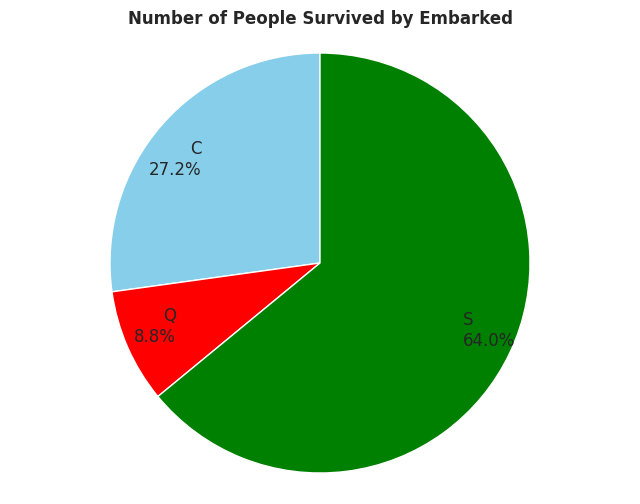

In [156]:
num_pp = tit_train.groupby('Embarked')['Survived'].sum()
num_pp = num_pp.reset_index()


labels = num_pp['Embarked']
sizes = num_pp['Survived']

combined_labels = [f'{label}\n{size / sum(sizes) * 100:.1f}%' for label, size in zip(labels, sizes)]

plt.figure(figsize=(8, 6))
texts = plt.pie(
    sizes,
    labels= combined_labels,
    labeldistance = 0.75,
    startangle=90,
    colors=['skyblue', 'red', 'green'],
    textprops={'fontsize': 12} 
)

plt.title('Number of People Survived by Embarked', fontweight='bold')
plt.axis('equal')
plt.show()

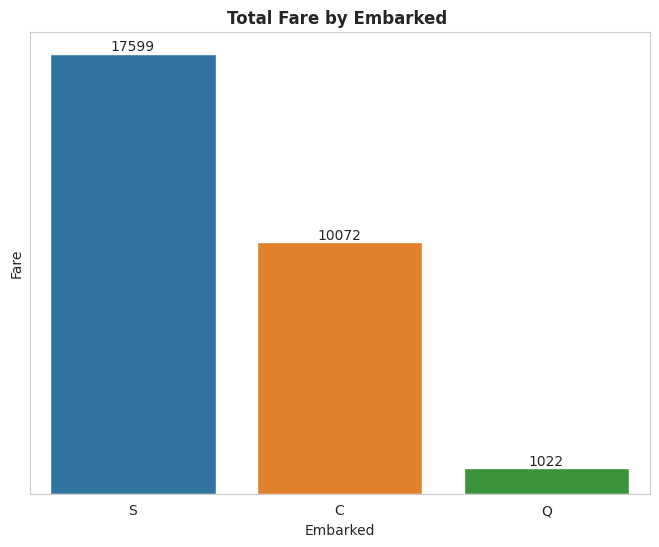

In [157]:
# Fare and the place of bording.
fare_price = tit_train.groupby('Embarked')['Fare'].sum().sort_values(ascending = False).reset_index()



plt.figure(figsize = (8,6))
ax = sns.barplot(data = fare_price, x = 'Embarked',y = 'Fare')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            round(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
plt.yticks(ticks = [], labels =[])
plt.title('Total Fare by Embarked ', fontweight = 'bold')
plt.show()



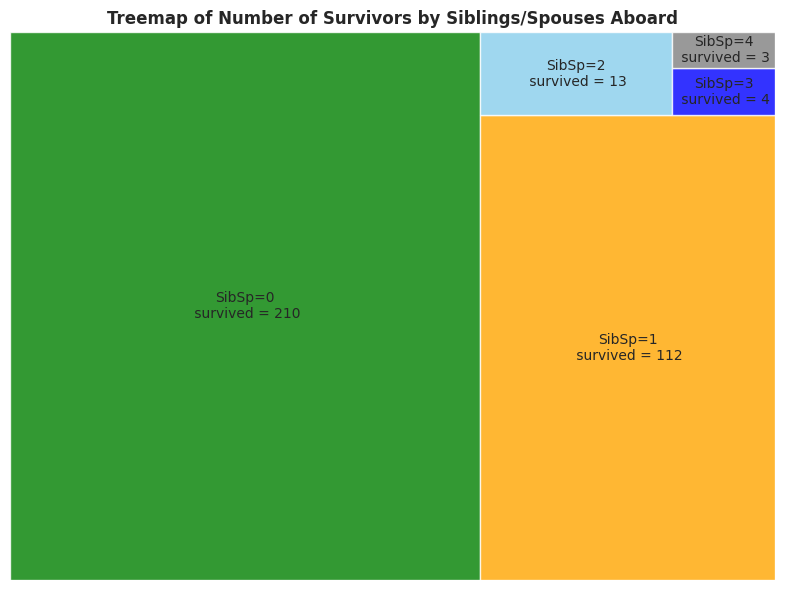

In [158]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

num_sb = tit_train.groupby('SibSp')['Survived'].sum().sort_values(ascending=False).reset_index()

num_sb = num_sb[num_sb['Survived'] > 0]

if num_sb['Survived'].sum() == 0:
    print("No survivors to plot.")
else:
    sizes = num_sb['Survived'].tolist()
    labels = [f'SibSp={row.SibSp}\n survived = {int(row.Survived)}' for _, row in num_sb.iterrows()]
    colors = ['green','orange', 'skyblue', 'blue', 'grey']

    plt.figure(figsize=(8,6))
    sns.set_style("whitegrid")
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
    plt.title('Treemap of Number of Survivors by Siblings/Spouses Aboard', fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plt.show()

## Changing Categorcal data into Numerical format a Machine can understand
- We start by droping columns that are not needed in the model.

In [159]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-39


In [160]:
# Drop columns
tit_train_ml = tit_train.copy()

tit_train_ml.drop(['Name', 'Ticket', 'Age Group'], axis = 1, inplace = True)



In [161]:
tit_train_ml.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [162]:
from sklearn.preprocessing import OneHotEncoder
col = ['Sex', 'Embarked']

OHE = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_o = OHE.fit_transform(tit_train_ml[col])

tit_train_ml = tit_train_ml.drop(columns = col)
train_encoded = pd.concat([tit_train_ml,encoded_o], axis = 1)

train_encoded.head()






,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [163]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [174]:
#Machine Learning using Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

x = train_encoded.drop(columns = 'Survived')
y = train_encoded['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

clf = dtree.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_pred)
r = classification_report(y_test,y_pred)
print(r)




[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


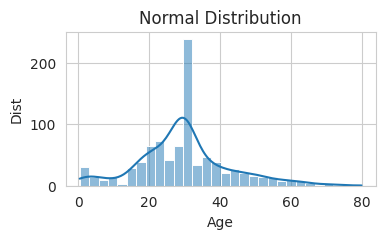

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
sns.histplot(data= tit_train, x = 'Age',kde = True)
plt.title("Normal Distribution")
plt.xlabel('Age')
plt.ylabel('Dist')
plt.show()

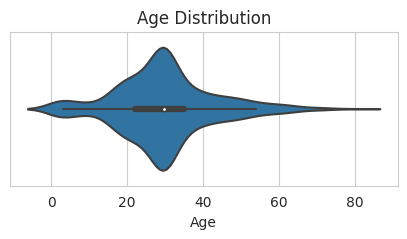

In [166]:
plt.figure(figsize= (5,2))
sns.violinplot(data = tit_train, x = "Age", kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

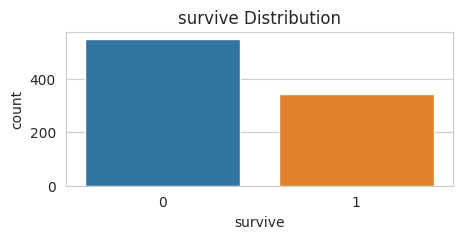

In [167]:
plt.figure(figsize = (5,2))
sns.countplot(data = tit_train, x = "Survived")
plt.title("survive Distribution")
plt.xlabel("survive")
plt.show()

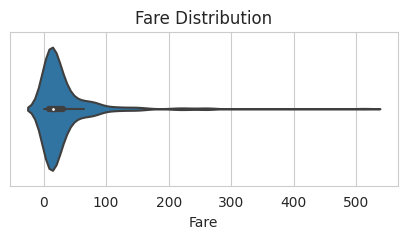

In [168]:
plt.figure(figsize= (5,2))
sns.violinplot(data = tit_train, x = "Fare", kde = True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

In [169]:
tit_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [170]:
tit_train["Fare"] = tit_train['Fare'].replace(0, 1e-6)
data = tit_train[tit_train['Fare' == 0]]
data.head()

KeyError: False

In [ ]:
train['Fare'] = train['fair']